In [2]:
import pandas as pd

# Cargar la base de datos (reemplaza 'archivo.xlsx' por el nombre de tu archivo)
df = pd.read_csv('listings.csv.gz')

# Quitar valores nulos de la columna 'price'
df = df.dropna(subset=['price'])

# Quitar el símbolo '$' y las comas de la columna 'price'
df['price'] = df['price'].replace({'\$':'', ',':''}, regex=True)

# Convertir la columna 'price' a float
df['price'] = df['price'].astype(float)

# Calcular el promedio de los precios
promedio_precio = df['price'].mean()
print(f'Promedio de precios: {promedio_precio}')

Promedio de precios: 1665.005981511691


In [3]:
# Mostrar el valor más común de la columna 'room_type'
mas_comun_room_type = df['room_type'].mode()[0]
print(f'El tipo de habitación más común es: {mas_comun_room_type}')

El tipo de habitación más común es: Entire home/apt


In [4]:
# Mostrar las 10 alcaldías con más alojamientos
top_alcaldias = df['neighbourhood_cleansed'].value_counts().head(10)
print('Las 10 alcaldías con más alojamientos son:')
print(top_alcaldias)

Las 10 alcaldías con más alojamientos son:
neighbourhood_cleansed
Cuauhtémoc             10434
Miguel Hidalgo          3764
Benito Juárez           2482
Coyoacán                1362
Álvaro Obregón           799
Venustiano Carranza      752
Tlalpan                  582
Gustavo A. Madero        424
Iztacalco                389
Azcapotzalco             317
Name: count, dtype: int64


In [5]:
# Mostrar los 10 host_name con más alojamientos
top_hosts = df['host_name'].value_counts().head(10)
print('Las 10 personas con más alojamientos son:')
print(top_hosts)

Las 10 personas con más alojamientos son:
host_name
Alejandra     305
Alejandro     244
Juan          241
Raul          225
Blueground    225
Luis          214
Mr. W         201
Carlos        175
Eduardo       173
Jorge         172
Name: count, dtype: int64


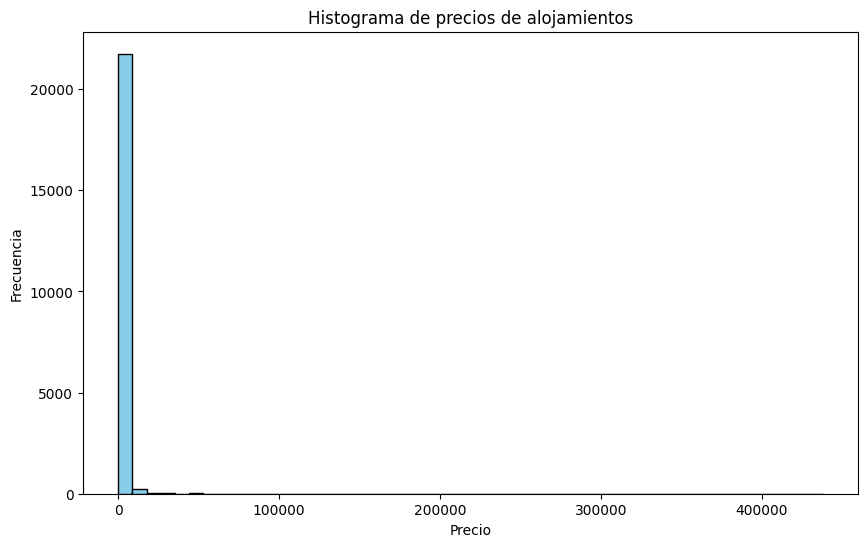

In [7]:
import matplotlib.pyplot as plt

# Graficar el histograma de precios
plt.figure(figsize=(10,6))
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histograma de precios de alojamientos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

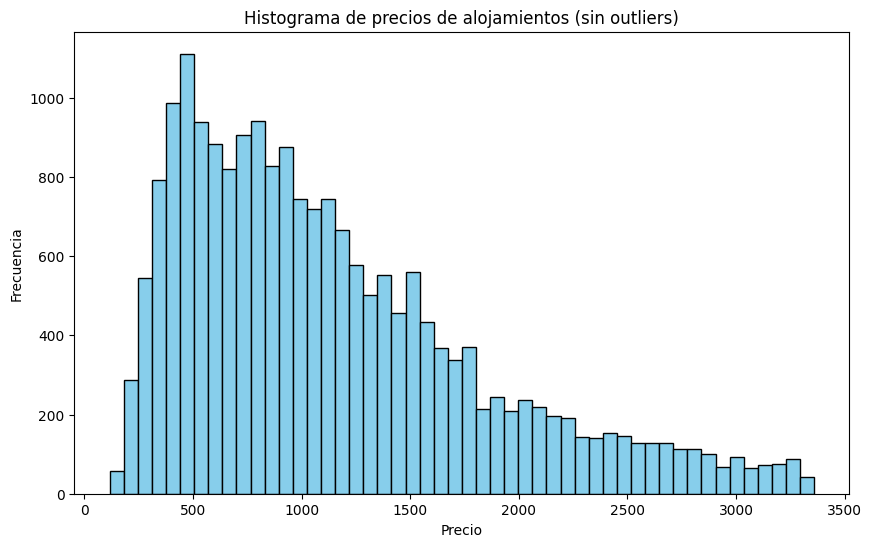

In [9]:
# Histograma de precios sin outliers (usando IQR)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_sin_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

plt.figure(figsize=(10,6))
plt.hist(df_sin_outliers['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histograma de precios de alojamientos (sin outliers)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

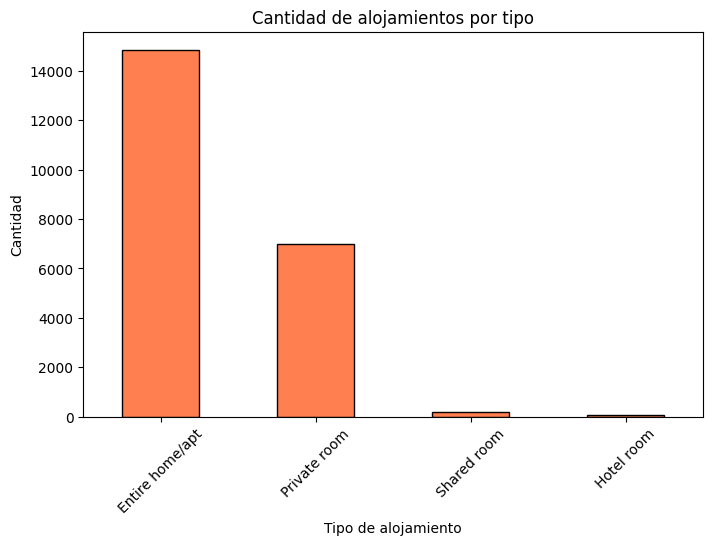

In [18]:
# Gráfica de barras: tipos de alojamiento vs cantidad
room_type_counts = df['room_type'].value_counts()
plt.figure(figsize=(8,5))
room_type_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Cantidad de alojamientos por tipo')
plt.xlabel('Tipo de alojamiento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

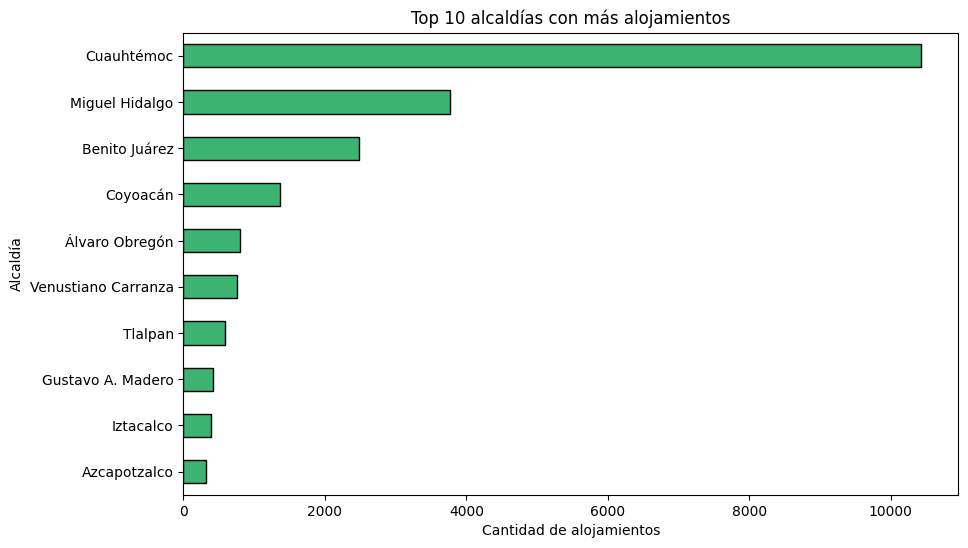

In [19]:
# Gráfica de barras horizontal del top 10 alcaldías con más alojamientos
top_alcaldias = df['neighbourhood_cleansed'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_alcaldias.plot(kind='barh', color='mediumseagreen', edgecolor='black')
plt.title('Top 10 alcaldías con más alojamientos')
plt.xlabel('Cantidad de alojamientos')
plt.ylabel('Alcaldía')
plt.gca().invert_yaxis()
plt.show()

In [22]:
import plotly.express as px

# Gráfica de distribución geográfica de precios con scattermapbox (sin bordes)
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="price",
                      color_continuous_scale="Viridis", size_max=8, zoom=10,
                      mapbox_style="open-street-map",
                      title="Distribución geográfica de precios de alojamientos")
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

C:\Users\Anonimo\AppData\Local\Temp\ipykernel_10808\2183378203.py:4: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

